Task 1 @codeSoft by MD_AYYAN      

Credit card fraud Detection using   1000 of both category 1 and 0

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv(r"D:\ayyan_11\CODE\Ml_codesoft\fraudTrain.csv\fraudTrain.csv")
df_test = pd.read_csv(r"D:\ayyan_11\CODE\Ml_codesoft\fraudTest.csv\fraudTest.csv")

In [14]:
df_test.count() 

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [19]:
print(df_train.shape[0])


1296675


In [22]:
df_test.shape

(555719, 23)

In [23]:
df = pd.concat([df_train, df_test])
df.shape[0]

1852394

In [24]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


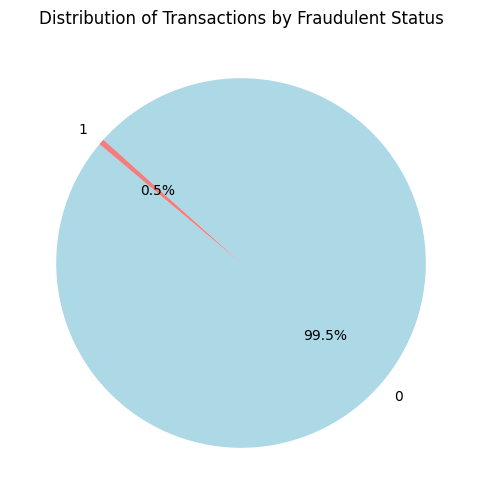

In [26]:


counts = df.groupby("is_fraud").count()["cc_num"]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Transactions by Fraudulent Status')
plt.show()


probablity of NOT FRAUD is way bigger , so model will have less accuraccy

In [27]:
df.tail(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [28]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [29]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

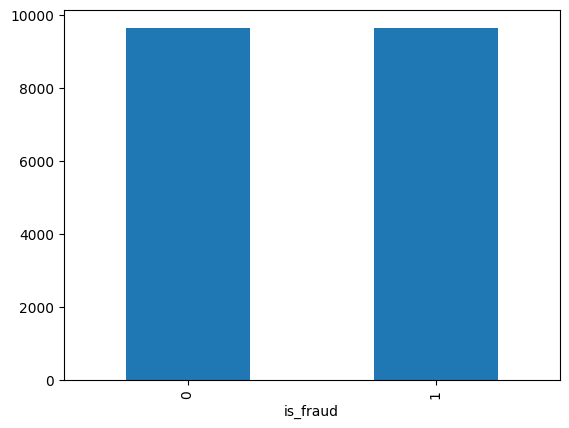

In [30]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19302 non-null  int64  
 1   trans_date_trans_time  19302 non-null  object 
 2   cc_num                 19302 non-null  int64  
 3   merchant               19302 non-null  object 
 4   category               19302 non-null  object 
 5   amt                    19302 non-null  float64
 6   first                  19302 non-null  object 
 7   last                   19302 non-null  object 
 8   gender                 19302 non-null  object 
 9   street                 19302 non-null  object 
 10  city                   19302 non-null  object 
 11  state                  19302 non-null  object 
 12  zip                    19302 non-null  int64  
 13  lat                    19302 non-null  float64
 14  long                   19302 non-null  float64
 15  cit

In [33]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

In [35]:
df_new.shape

(19302, 9)

In [37]:
df_new.isna().sum().sum()
df_new.duplicated().sum()
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


## Feature Engineering

In [38]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [40]:
df_new

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


In [42]:
datetime.now()

datetime.datetime(2024, 8, 2, 21, 0, 30, 797085)

In [41]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,27,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,62,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,43,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,28,0


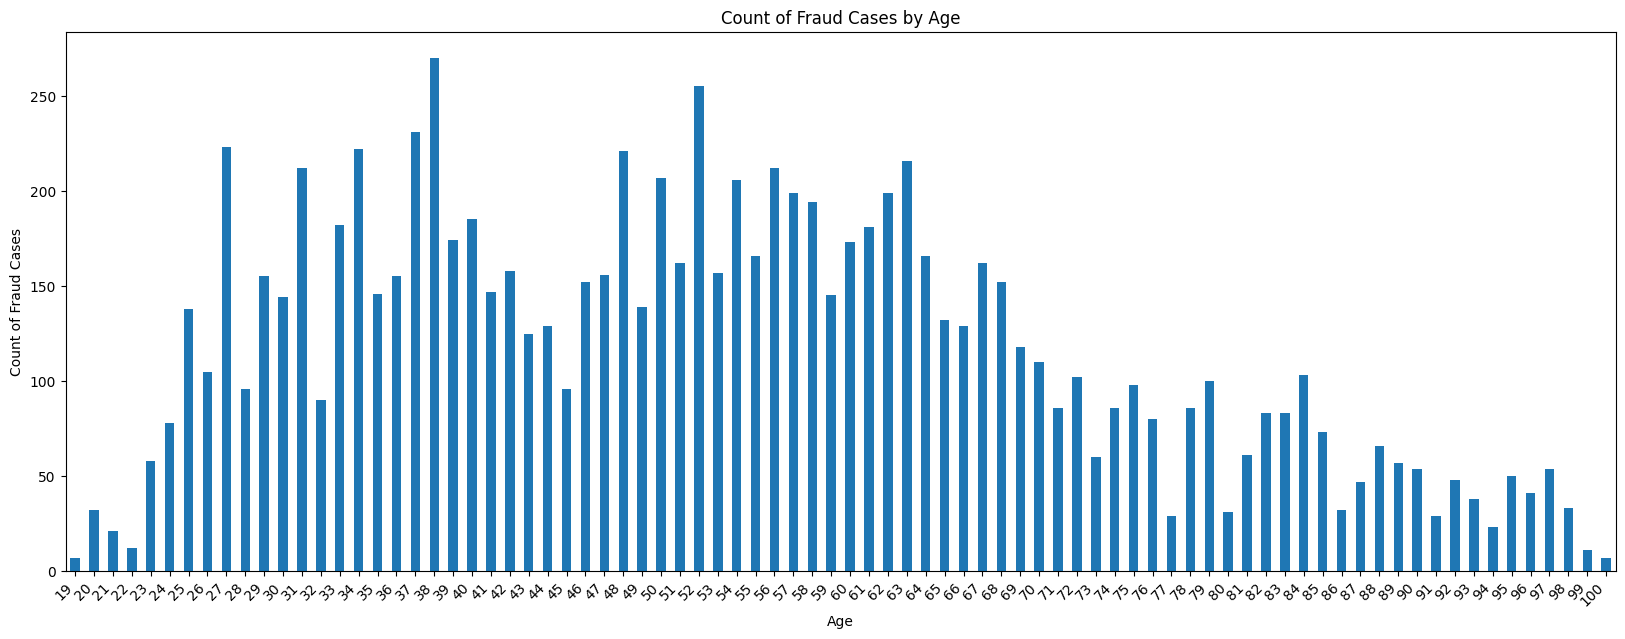

In [43]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()


In [44]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [45]:


print(numeric_columns)
print(categorical_columns)


['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [46]:
df_new.head(2)

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1


In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,165,27,35.9946,-81.7266,885,36,1
2472,2,11.52,733,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,733,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,165,27,35.9946,-81.7266,885,36,1
2553,4,275.73,733,43,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,2,62.58,392,40,32.8357,-79.8217,20478,27,0
274694,8,273.25,61,34,42.3200,-78.0943,1766,62,0
807093,9,2.74,305,48,42.9373,-87.9943,13973,43,0
861157,11,161.28,880,17,38.4921,-85.4524,564,28,0


In [48]:
columns = df_new.columns.tolist() 
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.709574,-0.048824,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2472,-1.225613,-0.766329,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2523,-0.709574,-0.061468,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2546,-1.225613,-0.778281,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2553,-0.709574,-0.063012,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
...,...,...,...,...,...,...,...,...,...
99709,-1.225613,-0.630409,-0.213387,0.943047,-1.126791,0.746758,-0.226818,-1.390633,0
274694,0.322505,-0.069614,-1.473365,0.523630,0.723280,0.869343,-0.288808,0.550060,0
807093,0.580524,-0.789701,-0.544559,1.502270,0.843695,0.166787,-0.248368,-0.503459,0
861157,1.096564,-0.367673,1.644225,-0.664718,-0.023416,0.347174,-0.292790,-1.335184,0


## Model 

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
}

In [52]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [53]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.951826,0.954143,0.949196,0.951663


Accuracy = 95% 

End of Task 1 @codeSoft by MD_AYYAN      